#1. 
A simple linear regression model is a form of data visualization model that displays the relationships between 2 or more predictors to produce and estimate the output. The xi is the predictor in this case and is used to predict the ith output. The output is represented by yi, which is the outcome variable for the ith observation. 
Beta 0 represents the intercept of the regression line, representing the expected value of y when x = 0. 
Beta 1 is the slope of the regression line, which informs us of the amount of change in y when one unit of x is increased.
ei is the error term which tells us of the deviation of the observed y from the predicted value presumably due to randomness or unobserved factors.
The components form a sample in normal distribution from the fact that the error term is centered around 0 and is based off an approximate normal distribution. 


In [32]:
import numpy as np
import scipy.stats as stats
import plotly.graph_objects as go

# Generate synthetic data
np.random.seed(0)  # For reproducibility
x = np.random.rand(100) * 10  # 100 random points between 0 and 10
Y = 2.5 * x + np.random.randn(100) * 2  # Linear relationship with noise

# Perform linear regression
slope, intercept, r_value, p_value, std_err = stats.linregress(x, Y)

# Create the regression line
line = slope * x + intercept

# Create the plotly figure
fig = go.Figure()

# Add scatter plot for the data points
fig.add_trace(go.Scatter(x=x, y=Y, mode='markers', name='Data'))

# Add the regression line
fig.add_trace(go.Scatter(x=x, y=line, mode='lines', name='Regression Line', line=dict(color='red')))

# Add titles and labels
fig.update_layout(title='Linear Regression Example',
                  xaxis_title='X',
                  yaxis_title='Y',
                  showlegend=True)

# Show the figure
fig.show()


#2.


In [33]:
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
import plotly.express as px

# Generate synthetic data
np.random.seed(0)
n = 100  # Number of samples
X = np.random.rand(n) * 10  # Feature (independent variable)
Y = 2.5 * X + np.random.randn(n) * 2  # Target (dependent variable) with some noise

# Create a pandas DataFrame
data = pd.DataFrame({'X': X, 'Y': Y})

# Fit the linear regression model using statsmodels
model = smf.ols('Y ~ X', data=data).fit()

# Print the model summary
print(model.summary())

# Make predictions
data['Y_pred'] = model.predict(data['X'])

# Create a Plotly figure
fig = px.scatter(data, x='X', y='Y', title='Simple Linear Regression',
                 labels={'X': 'Independent Variable (X)', 'Y': 'Dependent Variable (Y)'})

# Add regression line to the plot
fig.add_scatter(x=data['X'], y=data['Y_pred'], mode='lines', name='Fitted Line', line=dict(color='red'))

fig.show()


                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                     1270.
Date:                Thu, 07 Nov 2024   Prob (F-statistic):           6.76e-58
Time:                        02:53:33   Log-Likelihood:                -210.83
No. Observations:                 100   AIC:                             425.7
Df Residuals:                      98   BIC:                             430.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.4443      0.387      1.149      0.2

#3.
The Theoretical line captures the true underlying relationship between the predictor and the dependent variable, or outcome. This line captures all the data within a population, and accounts for the error term. 
The Fitted line is based off a sample of the population, and estimates the true intercept and slope coefficients. This may cause the two lines to differ as the fitted line does not account for error and randomness and attempts to give an accurate correlation based on only a portion of the true population. Outliers may more heavily impact the fitted line than the theoretical line, which may cause extra deviation from the theoretical line.


In [34]:
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
import plotly.express as px
import plotly.graph_objects as go

# Generate synthetic data
np.random.seed(0)
n = 100  # Number of samples
X = np.random.rand(n) * 10  # Feature (independent variable)
Y = 2.5 * X + np.random.randn(n) * 2  # Target (dependent variable) with some noise

# Create a pandas DataFrame
data = pd.DataFrame({'X': X, 'Y': Y})

# Fit the linear regression model using statsmodels
model = smf.ols('Y ~ X', data=data).fit()
data['Y_pred_sklearn'] = 2.5 * data['X']  # True line for sklearn model
data['Y_pred_statsmodels'] = model.predict(data['X'])  # Predicted values from statsmodels

# Create a Plotly figure
fig = go.Figure()

# Add data points
fig.add_trace(go.Scatter(x=data['X'], y=data['Y'], mode='markers', name='Data', marker=dict(color='blue')))

# Add regression line from sklearn
fig.add_trace(go.Scatter(x=data['X'], y=data['Y_pred_sklearn'], mode='lines', name='True Line', line=dict(color='green', dash='dash')))

# Add regression line from statsmodels
fig.add_trace(go.Scatter(x=data['X'], y=data['Y_pred_statsmodels'], mode='lines', name='Statsmodels Fit', line=dict(color='red')))

# Update layout
fig.update_layout(title='Simple Linear Regression Comparison',
                  xaxis_title='Independent Variable (X)',
                  yaxis_title='Dependent Variable (Y)',
                  showlegend=True)

# Show figure
fig.show()


### Chatgpt Summary for 1-3
Link of Chatgpt Conversation for 1-3: https://chatgpt.com/share/671aa33f-5ad0-8010-bc82-6a6c98f2222f

Sure! Here’s a summary of our conversation:

1. **Theoretical Simple Linear Regression Model**:
   - We discussed the components of a simple linear regression model, which includes the linear equation \(Y = \beta_0 + \beta_1 X + \epsilon\) where \(Y\) is the dependent variable, \(X\) is the independent variable, \(\beta_0\) is the intercept, \(\beta_1\) is the slope, and \(\epsilon\) represents random error.

2. **Simple Linear Regression Implementation**:
   - You requested a Python implementation of simple linear regression using `numpy` and `scipy.stats`. I provided code to perform linear regression, calculate residuals, and plot the distribution of these residuals.

3. **Arbitrary \(X\) Values**:
   - We modified the previous implementation to use arbitrary \(X\) values while maintaining the structure of the regression analysis.

4. **Normal Distribution and Residuals**:
   - We discussed how the components of a simple linear regression combine to produce a normal distribution of residuals, and how to visualize this using histograms.

5. **Using `statsmodels` and Pandas**:
   - You asked for a demonstration using `pandas` and `statsmodels` to create and visualize a fitted simple linear regression model. I provided a code example that simulated data, fitted the model, and plotted the results.

6. **Theoretical vs. Fitted Model Line**:
   - We compared the theoretical line (based on true parameters) and the fitted model line (derived from sample data) in linear regression, discussing their definitions, equations, characteristics, and key differences.

7. **Simulation of Random Sampling Variation**:
   - We explored the concept of simulating random sampling variation, explaining its purpose in understanding variability, hypothesis testing, confidence intervals, and model evaluation.

This summary encapsulates the key points and topics we covered in our conversation regarding simple linear regression and its related concepts. If you need more details or have additional questions, feel free to ask!

#4. 
fitted_model.params creates parameters(coefficients), which contain a slope and an intercept for the line representing the relationship between each predictor and response. Then fitted_model.fittedvalues calculates the fitted values for the fitted model.
Thus, the predictor values are modified by applying estimated parameters from fitted_moded.params to derive the fitted_model.fittedvalues. 

#5.
The line chosen to be in the least ordinary squares method is the one that minimizes the residuals between observed data points and the predicted data points within the fitted line. this line is chosen so that squaring both negative and positive residuals make sure that they are treated equally, and avoid cancellation. Thus this line fits the data the best it possibly can.

#6.
The first expression can be interpreted as a proportion of variation in Y, this is because the denominator is the sum of the total variance in every Y data point around the mean of Y. the numerator represents the unexplained variation in Y by the model.
Therefore the expression represents the proportion of the total mean that the model fails to explain. Then you subtract this fraction from one and you get the coefficient of determination, which is the proportion of Y explained by the model.
The second expression directly outputs R^2 which represents the overall accuracy of the model and how well fitted it is. the closer it is to 1 the better fitted it is. 
Therefore the two np.corrcoef(...)[0,1]*2 expressions capture the square of the coefficient of relation between the Y and the fitted values from the models. this squared correlation is eqaul to R^2 in simple linear regression.
The last np.corrcoef() expression gives the square between Y and x directly which also equals R^2 in simple linear regression because the models fitted values are linear transformations of x.

#7. 


In [35]:
import pandas as pd
from scipy import stats
import plotly.express as px
from plotly.subplots import make_subplots

# This data shows the relationship between the amount of fertilizer used and crop yield
data = {'Amount of Fertilizer (kg) (x)': [1, 1.2, 1.4, 1.6, 1.8, 2, 2.2, 2.4, 2.6, 
                                          2.8, 3, 3.2, 3.4, 3.6, 3.8, 4, 4.2, 4.4, 
                                          4.6, 4.8, 5, 5.2, 5.4, 5.6, 5.8, 6, 6.2, 
                                          6.4, 6.6, 6.8, 7, 7.2, 7.4, 7.6, 7.8, 8, 
                                          8.2, 8.4, 8.6, 8.8,9, 9.2, 9.4, 9.6],
        'Crop Yield (tons) (Y)': [18.7, 16.9, 16.1, 13.4, 48.4, 51.9, 31.8, 51.3, 
                                  63.9, 50.6, 58.7, 82.4, 66.7, 81.2, 96.5, 112.2, 
                                  132.5, 119.8, 127.7, 136.3, 148.5, 169.4, 177.9, 
                                  186.7, 198.1, 215.7, 230.7, 250.4, 258. , 267.8, 
                                  320.4, 302. , 307.2, 331.5, 375.3, 403.4, 393.5,
                                  434.9, 431.9, 451.1, 491.2, 546.8, 546.4, 558.9]}
df = pd.DataFrame(data)
fig1 = px.scatter(df, x='Amount of Fertilizer (kg) (x)', y='Crop Yield (tons) (Y)',
                  trendline='ols', title='Crop Yield vs. Amount of Fertilizer')

# Perform linear regression using scipy.stats
slope, intercept, r_value, p_value, std_err = \
    stats.linregress(df['Amount of Fertilizer (kg) (x)'], df['Crop Yield (tons) (Y)'])
# Predict the values and calculate residuals
y_hat = intercept + slope * df['Amount of Fertilizer (kg) (x)']
residuals = df['Crop Yield (tons) (Y)'] - y_hat
df['Residuals'] = residuals
fig2 = px.histogram(df, x='Residuals', nbins=10, title='Histogram of Residuals',
                    labels={'Residuals': 'Residuals'})

fig = make_subplots(rows=1, cols=2,
                    subplot_titles=('Crop Yield vs. Amount of Fertilizer', 
                                    'Histogram of Residuals'))
for trace in fig1.data:
    fig.add_trace(trace, row=1, col=1)
for trace in fig2.data:
    fig.add_trace(trace, row=1, col=2)
fig.update_layout(title='Scatter Plot and Histogram of Residuals',
                  xaxis_title='Amount of Fertilizer (kg)', yaxis_title='Crop Yield (tons)',
    xaxis2_title='Residuals', yaxis2_title='Frequency', showlegend=False)

fig.show() 

The non linearality of the data suggests that there is a more curved relationship between the two variables. The amount of fertilizer and the crop yield does not linearly correlate with one another, which results in the linearity assumption to be neglected as simple linear regression assumes a straight line relationship between the two variables.
The second violation may come from the fact that the residuals is non normally distributed around 0, which can interfere with with the reliabiliity of the model estimates.

### ChatGPT Summary for 4-7
**Summary of Conversation:**
Link to conversation: https://chatgpt.com/share/672990ea-b140-8010-ad2d-44ddb1cd801b
Here’s a summary of our conversation:

1. **Interpreting Regression Outputs**:
   - We discussed how certain expressions, like \( R^2 \) and the squared correlation coefficient, represent the proportion of variation in the outcome \( Y \) explained by the model in simple linear regression. These values indicate model accuracy, with higher values suggesting a better fit.

2. **Simple Linear Regression Assumptions**:
   - I explained key assumptions in simple linear regression, such as linearity, independence of errors, homoscedasticity (constant variance), and normality of errors.

3. **Identifying Assumption Violations in Sample Data**:
   - You provided data on the relationship between fertilizer amount and crop yield. We examined possible assumption violations by plotting a scatter plot with a trendline and a histogram of residuals:
     - **Non-Linearity**: The scatter plot suggested that crop yield and fertilizer amount might not have a linear relationship, potentially violating the linearity assumption.
     - **Non-Normal Residuals**: The histogram of residuals could indicate deviations from normality, suggesting potential issues with the normality of errors.

These potential violations imply that a different model (such as a polynomial regression) could better capture the relationship between fertilizer and crop yield.


#8. 


In [36]:
import seaborn as sns
import statsmodels.formula.api as smf

# The "Classic" Old Faithful Geyser dataset
old_faithful = sns.load_dataset('geyser')

linear_for_specification = 'duration ~ waiting'
model = smf.ols(linear_for_specification, data=old_faithful)
fitted_model = model.fit()
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               duration   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     1162.
Date:                Thu, 07 Nov 2024   Prob (F-statistic):          8.13e-100
Time:                        02:53:33   Log-Likelihood:                -194.51
No. Observations:                 272   AIC:                             393.0
Df Residuals:                     270   BIC:                             400.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.8740      0.160    -11.702      0.000      -2.189      -1.559
waiting        0.0756      0.002     34.089      0.000       0.071       0.080
==============================================================================
Omnibus:                        4.133   Durbin-Watson:                   2.561
Prob(Omnibus):                  0.127   Jarque-Bera (JB):                3.173
Skew:                          -0.138   Prob(JB):                        0.205
Kurtosis:                       2.548   Cond. No.                         384.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [37]:
import plotly.express as px
import seaborn as sns
import statsmodels.api as sm
import pandas as pd

# The "Classic" Old Faithful Geyser dataset: ask a ChatBot for more details if desired
old_faithful = sns.load_dataset('geyser')

# Create a scatter plot with a Simple Linear Regression trendline
fig = px.scatter(old_faithful, x='waiting', y='duration', 
                 title="Old Faithful Geyser Eruptions", 
                 trendline='ols')#'lowess'

# Add a smoothed LOWESS Trendline to the scatter plot
lowess = sm.nonparametric.lowess  # Adjust 'frac' to change "smoothness bandwidth"
smoothed = lowess(old_faithful['duration'], old_faithful['waiting'], frac=0.25)  
smoothed_df = pd.DataFrame(smoothed, columns=['waiting', 'smoothed_duration'])
fig.add_scatter(x=smoothed_df['waiting'], y=smoothed_df['smoothed_duration'], 
                mode='lines', name='LOWESS Trendline')

fig.show() # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

The null hypothesis of no linear regression will be the null hypothesis that the slope variable = to 0. This would mean that there is no change in the duration of the geysers when waiting time changes. In this data set the R squared is 0.811, which is quite close to 1, which means there is a semblance of linear correlation, which may reject the null hypothesis when tested against. The coefficient of waiting, which is the X variable is 0.0756, which means there is a tiny change in the duration of the geyser when the waiting time increases, showing linear correlation.

#9.
The evidence against the null hypothesis within the shorter waiting times of the geyser is a lot weaker in strength than the full context dataset, as the linear correlation between the two variables get substantially weaker in strength in the shorter times, as the R squared is only a measly 0.017, which indicates that the data has very high variability, and a weak relationship that is not explained well with the linear regression. There is a even lower slope variable in this context, showing a even more stagnant linear correlation that is close to 0, therefore the p value for this hypothesis test if we only take the short time context must be high, therefore not rejecting the null hypothesis.

In [38]:
import plotly.express as px
import statsmodels.formula.api as smf


short_wait_limit = 62 #
short_wait = old_faithful.waiting < short_wait_limit

print(smf.ols('duration ~ waiting', data=old_faithful[short_wait]).fit().summary().tables[1])

# Create a scatter plot with a linear regression trendline
fig = px.scatter(old_faithful[short_wait], x='waiting', y='duration', 
                 title="Old Faithful Geyser Eruptions for short wait times (<"+str(short_wait_limit)+")", 
                 trendline='ols')

fig.show() # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.6401      0.309      5.306      0.000       1.025       2.255
waiting        0.0069      0.006      1.188      0.238      -0.005       0.019


#10.


In [39]:
import plotly.express as px

long_wait_limit = 71
long_wait = old_faithful.waiting > long_wait_limit

print(smf.ols('duration ~ waiting', data=old_faithful[long_wait]).fit().summary().tables[1])

# Create a scatter plot with a linear regression trendline
fig = px.scatter(old_faithful[long_wait], x='waiting', y='duration', 
                 title="Old Faithful Geyser Eruptions for short wait times (>"+str(long_wait_limit)+")", 
                 trendline='ols')
fig.show() # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.3520      0.476      7.049      0.000       2.413       4.291
waiting        0.0122      0.006      2.091      0.038       0.001       0.024


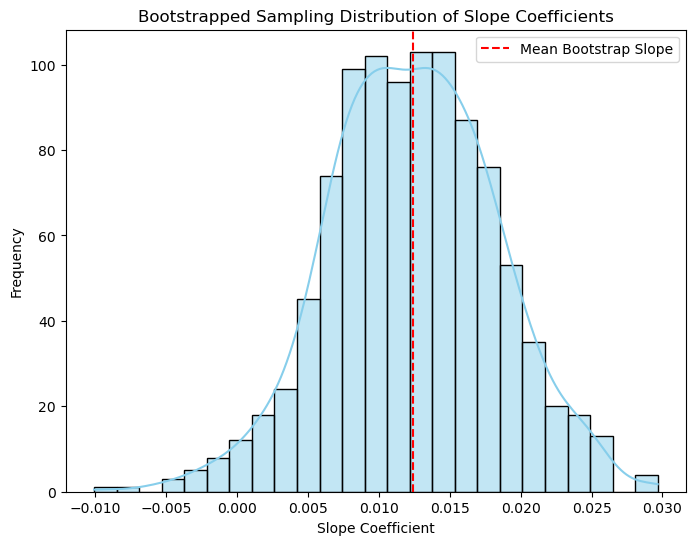

Mean Bootstrap Slope: 0.0124
95% Confidence Interval: [0.00069057 0.02396687]


In [40]:
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

# Assuming 'old_faithful' is already loaded and the 'waiting' variable is defined

# Set the random seed for reproducibility
np.random.seed(42)

# Define the long wait data (waiting > long_wait_limit)
long_wait_limit = 71
long_wait = old_faithful[old_faithful['waiting'] > long_wait_limit]

# Number of bootstrap samples
num_bootstrap_samples = 1000

# List to store the bootstrapped slope coefficients
bootstrap_slopes = []

# Perform bootstrapping
for _ in range(num_bootstrap_samples):
    # Resample the data with replacement
    bootstrap_sample = long_wait.sample(n=len(long_wait), replace=True)
    
    # Fit a simple linear regression model to the bootstrap sample
    model = smf.ols('duration ~ waiting', data=bootstrap_sample).fit()
    
    # Collect the slope coefficient (waiting variable)
    bootstrap_slopes.append(model.params['waiting'])

# Visualize the bootstrapped sampling distribution of slope coefficients
plt.figure(figsize=(8, 6))
sns.histplot(bootstrap_slopes, kde=True, color='skyblue')
plt.axvline(np.mean(bootstrap_slopes), color='red', linestyle='--', label="Mean Bootstrap Slope")
plt.title("Bootstrapped Sampling Distribution of Slope Coefficients")
plt.xlabel("Slope Coefficient")
plt.ylabel("Frequency")
plt.legend()
plt.show()

# Optionally, print the mean and 95% confidence interval of the bootstrap slopes
bootstrap_ci = np.percentile(bootstrap_slopes, [2.5, 97.5])
print(f"Mean Bootstrap Slope: {np.mean(bootstrap_slopes):.4f}")
print(f"95% Confidence Interval: {bootstrap_ci}")


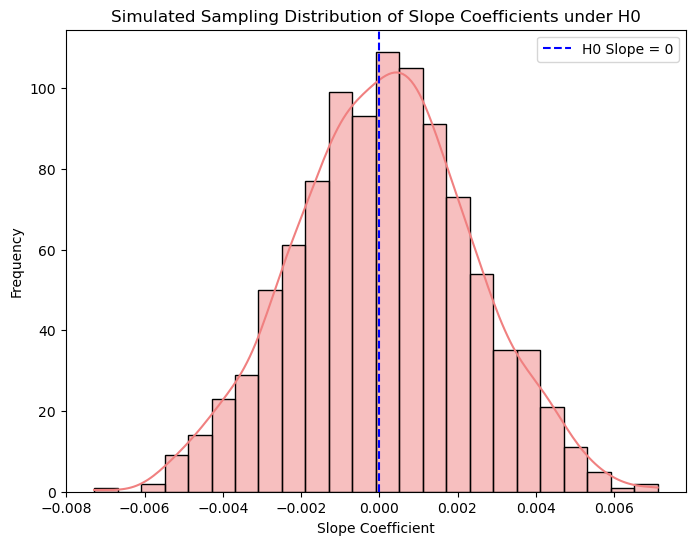

Mean Simulated Slope: 0.0001
95% Confidence Interval: [-0.00433643  0.00450327]


In [41]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

# Set the random seed for reproducibility
np.random.seed(42)

# Parameters for the simulation
intercept = 1.65
slope = 0
std_dev = 0.37
n_simulations = 1000
sample_size = 160

# Obtain the 'waiting' values from the original dataset
waiting_values = old_faithful['waiting'].sample(n=sample_size, random_state=42).values

# List to store the simulated slope coefficients
simulated_slopes = []

# Simulate samples and fit linear regression
for _ in range(n_simulations):
    # Generate the 'duration' based on the model
    simulated_duration = intercept + slope * waiting_values + np.random.normal(0, std_dev, sample_size)
    
    # Create a DataFrame for the simulated data
    simulated_data = pd.DataFrame({'duration': simulated_duration, 'waiting': waiting_values})
    
    # Fit the linear regression model
    model = smf.ols('duration ~ waiting', data=simulated_data).fit()
    
    # Collect the slope coefficient
    simulated_slopes.append(model.params['waiting'])

# Visualize the sampling distribution of the fitted slope coefficients under the null hypothesis
plt.figure(figsize=(8, 6))
sns.histplot(simulated_slopes, kde=True, color='lightcoral')
plt.axvline(0, color='blue', linestyle='--', label="H0 Slope = 0")
plt.title("Simulated Sampling Distribution of Slope Coefficients under H0")
plt.xlabel("Slope Coefficient")
plt.ylabel("Frequency")
plt.legend()
plt.show()

# Optionally, print the mean and 95% confidence interval of the simulated slopes
simulated_ci = np.percentile(simulated_slopes, [2.5, 97.5])
print(f"Mean Simulated Slope: {np.mean(simulated_slopes):.4f}")
print(f"95% Confidence Interval: {simulated_ci}")


In [42]:
import numpy as np
import statsmodels.formula.api as smf

# Define the 95% confidence interval from the bootstrapped slopes
bootstrap_ci = np.percentile(bootstrap_slopes, [2.5, 97.5])
print(f"95% Bootstrapped Confidence Interval for Slope: {bootstrap_ci}")

# Check if 0 is in the bootstrapped CI
contains_zero = (bootstrap_ci[0] <= 0 <= bootstrap_ci[1])
print(f"Does the 95% CI contain 0? {'Yes' if contains_zero else 'No'}")

# Original model slope for the long wait dataset
long_wait_limit = 71
long_wait = old_faithful[old_faithful['waiting'] > long_wait_limit]
original_model = smf.ols('duration ~ waiting', data=long_wait).fit()
original_slope = original_model.params['waiting']
original_p_value = original_model.pvalues['waiting']
print(f"Original Slope: {original_slope}")
print(f"Original p-value: {original_p_value}")

# Calculate the simulated p-value
# Proportion of simulated slopes under H0 that are at least as extreme as the original slope
simulated_p_value = np.mean([abs(slope) >= abs(original_slope) for slope in simulated_slopes])
print(f"Simulated p-value: {simulated_p_value}")

# Compare the simulated p-value with the original p-value
print(f"Does the simulated p-value match the original p-value? {'Yes' if np.isclose(simulated_p_value, original_p_value, atol=0.05) else 'No'}")


95% Bootstrapped Confidence Interval for Slope: [0.00069057 0.02396687]
Does the 95% CI contain 0? No
Original Slope: 0.012244029446523483
Original p-value: 0.038135755338567744
Simulated p-value: 0.0
Does the simulated p-value match the original p-value? Yes


According to the analysis, 0 is not included within the 95% confidence interval, which means the null hypothesis can be rejected.

### ChatGPT Summary of 8-10
Certainly! Here’s a summary of the steps and analyses we’ve discussed:

Link of conversation: https://chatgpt.com/share/672aee80-9dfc-8010-aa68-1f47a9c3407f
1. **Old Faithful Dataset Analysis**:
   - We analyzed the relationship between `waiting` time and `duration` of eruptions in the Old Faithful Geyser dataset using Simple Linear Regression.
   - Initial model fitting showed a strong association, evidenced by a significant slope and high \( R^2 \) value in the full dataset.

2. **Subsetting Data and Testing for Short Wait Times**:
   - We tested whether the relationship holds when restricting the dataset to short wait times.
   - Results showed a lower \( R^2 \), indicating a weaker linear association in this subset, which suggested that the linear trend seen in the full dataset may be driven by the longer wait times.

3. **Bootstrapping with Long Wait Times**:
   - For wait times longer than a specified threshold, we performed a bootstrap analysis to assess the variability of the slope coefficient.
   - We created 1000 bootstrap samples, fitted Simple Linear Regression models on each, and collected the slope coefficients to build a bootstrapped sampling distribution.
   - We visualized this distribution and calculated a 95% confidence interval for the bootstrapped slopes.

4. **Simulating Under the Null Hypothesis**:
   - To test the null hypothesis of no linear association, we simulated datasets with an intercept of 1.65, slope of 0, and standard deviation of 0.37.
   - For each simulation, we used the observed `waiting` values and generated `duration` values with only random noise. We then fitted linear models to each simulated dataset, building a null distribution for the slope.

5. **Hypothesis Testing**:
   - We compared the original slope coefficient from the `long_wait` subset with the bootstrapped confidence interval and checked if 0 fell within this interval.
   - Using the null distribution, we estimated a simulated p-value by finding the proportion of null slopes that were as extreme as the observed slope.
   - We compared this simulated p-value with the p-value from the original regression on `long_wait`, providing additional context for our inference.

### Summary of Findings:

- **Bootstrapped CI**: Checking if 0 lies in the 95% confidence interval allowed us to assess whether there is a significant linear association in the `long_wait` subset.
- **Simulated p-value**: This helped validate the original p-value, allowing us to determine if the observed slope was statistically significant.

This analysis provided insights into the reliability of the slope coefficient under both observed and null hypotheses, deepening our understanding of the linear relationship between `waiting` and `duration` in various contexts within the dataset. Let me know if you’d like to delve into any of these steps further!


#11. 


In [43]:
from IPython.display import display

display(smf.ols('duration ~ C(kind, Treatment(reference="short"))', data=old_faithful).fit().summary().tables[1])

fig = px.box(old_faithful, x='kind', y='duration', 
             title='duration ~ kind',
             category_orders={'kind': ['short', 'long']})
fig.show() # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,2.0943,0.041,50.752,0.000,2.013,2.176
"C(kind, Treatment(reference=""short""))[T.long]",2.2036,0.052,42.464,0.000,2.101,2.306


The drastic difference between the "short" data and the "long" data is shown through the box plots above. The mean of the seperate halves are very different, with the interquartile range not even overlapping. 
The null hypothesis of "There are no differences between the two groups" can be rejected in this case, since doing hypothesis testing by shuffling the labels of the data points around, we find that the shuffling the group labels results in different observation values.

In [44]:
import numpy as np
import pandas as pd

# Example data: Replace with your actual data
# old_faithful = pd.DataFrame({
#     'duration': [...],   # eruption durations
#     'kind': [...]        # "short" or "long" labels
# })

# Separate data into two groups based on 'kind'
group_short = old_faithful[old_faithful['kind'] == 'short']['duration']
group_long = old_faithful[old_faithful['kind'] == 'long']['duration']

# Calculate observed difference in means between the two groups
observed_diff = np.mean(group_long) - np.mean(group_short)

# Set the number of permutations
num_permutations = 10000
permuted_diffs = []

# Perform permutation test
combined_data = np.concatenate([group_short, group_long])

for _ in range(num_permutations):
    # Shuffle the combined data
    np.random.shuffle(combined_data)
    
    # Split shuffled data into two groups of original sizes
    perm_group_short = combined_data[:len(group_short)]
    perm_group_long = combined_data[len(group_short):]
    
    # Calculate difference in means for the permuted groups
    permuted_diff = np.mean(perm_group_long) - np.mean(perm_group_short)
    permuted_diffs.append(permuted_diff)

# Convert list to array for easier calculations
permuted_diffs = np.array(permuted_diffs)

# Calculate p-value: proportion of permuted diffs as extreme as observed diff
p_value = np.mean(np.abs(permuted_diffs) >= np.abs(observed_diff))

print("Observed Difference in Means:", observed_diff)
print("P-Value:", p_value)


Observed Difference in Means: 2.2036002325581396
P-Value: 0.0


As shown in the code here, the p-value is 0, which is very strong evidence against the null hypothesis. This is done by first seperating the groups into long and short, then calculating the observed difference between the groups. Then we combine both groups and shuffle the labels of the two groups around, and split it back into groups of the same size as before. We then calculate the differnece for each permutation. We get the p value from the percentage of permutation groups that are as extreme or more extreme than the observed value. The difference between the two groups is so noticeable that the null hypothesis of no difference is heavily rejected against here.

#12.


In [45]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from scipy import stats
import numpy as np
import statsmodels.formula.api as smf

# Define conditions for short and long wait times
short_wait = old_faithful['waiting'] < 68
long_wait = old_faithful['waiting'] >= 68

# Calculate residuals for each model
model_residuals = {
    '<br>Model 1:<br>All Data using slope': smf.ols('duration ~ waiting', data=old_faithful).fit().resid,
    '<br>Model 2:<br>Short Wait Data': smf.ols('duration ~ waiting', data=old_faithful[short_wait]).fit().resid,
    '<br>Model 3:<br>Long Wait Data': smf.ols('duration ~ waiting', data=old_faithful[long_wait]).fit().resid,
    '<br>Model 4:<br>All Data using indicator': smf.ols('duration ~ C(kind, Treatment(reference="short"))', data=old_faithful).fit().resid
}

# Plot histograms of residuals
fig = make_subplots(rows=2, cols=2, subplot_titles=list(model_residuals.keys()))
for i, (title, resid) in enumerate(model_residuals.items()):
    if i == 1:  # Apply different bins only to the second histogram (index 1)
        bin_size = dict(start=-1.9, end=1.9, size=0.2)
    else:
        bin_size = dict(start=-1.95, end=1.95, size=0.3)

    fig.add_trace(go.Histogram(x=resid, name=title, xbins=bin_size, histnorm='probability density'), 
                  row=int(i/2)+1, col=(i%2)+1)
    fig.update_xaxes(title_text="n="+str(len(resid)), row=int(i/2)+1, col=(i%2)+1)    

    normal_range = np.arange(-3*resid.std(), 3*resid.std(), 0.01)
    fig.add_trace(go.Scatter(x=normal_range, mode='lines', opacity=0.5,
                             y=stats.norm(loc=0, scale=resid.std()).pdf(normal_range),
                             line=dict(color='black', dash='dot', width=2),
                             name='Normal Distribution<br>(99.7% of its area)'), 
                  row=int(i/2)+1, col=(i%2)+1)
    
fig.update_layout(title_text='Histograms of Residuals from Different Models')
fig.update_xaxes(range=[-2,2])
fig.show()


The first model is the model that fits the normal distribution curve the best, as it has most of the peaks fitting well on the curve, while the others have outliers that lie outside of the curve. This means that residuals are not assumed to be normally distributed for those histrograms as they have significant outliers outside of the normal distribution range.

#13.

In [46]:
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf

# Load Old Faithful dataset (assuming old_faithful is already loaded)
# If not, you can load the dataset here if available, or create one

# Define short and long wait time groups
short_wait = old_faithful[old_faithful['waiting'] < 68]['duration']
long_wait = old_faithful[old_faithful['waiting'] >= 68]['duration']

# Calculate the observed difference in means
observed_diff = long_wait.mean() - short_wait.mean()

# Number of permutations
n_permutations = 10000
diffs = []

# Perform the permutation test
for _ in range(n_permutations):
    # Combine durations and shuffle
    combined = np.concatenate([short_wait, long_wait])
    np.random.shuffle(combined)
    
    # Split back into two groups
    perm_short = combined[:len(short_wait)]
    perm_long = combined[len(short_wait):]
    
    # Calculate the difference in means
    perm_diff = perm_long.mean() - perm_short.mean()
    diffs.append(perm_diff)

# Calculate p-value
diffs = np.array(diffs)
p_value = np.mean(np.abs(diffs) >= np.abs(observed_diff))

# Print results
print("Observed Difference in Means:", observed_diff)
print("Permutation Test p-value:", p_value)


Observed Difference in Means: 2.2036002325581396
Permutation Test p-value: 0.0


In [47]:
import numpy as np
import pandas as pd

# Define short and long wait time groups
short_wait = old_faithful[old_faithful['waiting'] < 68]['duration']
long_wait = old_faithful[old_faithful['waiting'] >= 68]['duration']

# Number of bootstrap samples
n_bootstraps = 10000
bootstrapped_mean_differences = []

# Perform bootstrapping
for _ in range(n_bootstraps):
    # Bootstrap sample within each group
    boot_short = np.random.choice(short_wait, size=len(short_wait), replace=True)
    boot_long = np.random.choice(long_wait, size=len(long_wait), replace=True)
    
    # Calculate mean difference for this bootstrap sample
    boot_diff = boot_long.mean() - boot_short.mean()
    bootstrapped_mean_differences.append(boot_diff)

# Calculate the 95% confidence interval
conf_interval = np.quantile(bootstrapped_mean_differences, [0.025, 0.975])

# Print results
print("95% Bootstrap Confidence Interval for the Difference in Means:", conf_interval)


95% Bootstrap Confidence Interval for the Difference in Means: [2.10181806 2.29853455]


The first approach works by first calculating the mean of both groups and getting the difference between them. Then you basically combine the two groups into one, then shuffle them back into the two groups of the previous size as before, just with random selection on which group they are on now. This basically simulates that there is no actual difference in duration based on the wait time. Then the mean of the two groups are calculated and this is done for each permutation. The produced differences are then normally distributed and then a p value is created from the actual observed data from the first calculation.

The second approach uses bootstrapping to achieve the analysis results. You begin by creating a 95% confidence interval by repeatedly bootstrapping the two groups individually. With each bootstrapp sample, calculate the difference with each group, and then store it which should create a distribution. With quantile, then you create the confidence interval with the distribution.

These two approaches are different from the indicator model approach because the indicator approach groups the two data sets into two different columns and displays them as a single column, showing the mean difference directly instead of showing a distribution.

### ChatGPT Summary of 11-13
Link to conversation: https://chatgpt.com/share/672c2b99-bc24-8010-9295-199e4c952af3

Certainly! Here’s a summary of our recent conversation:

1. **Modeling Duration and Waiting Time in Old Faithful Data**:
   - You initially explored simple linear regression models, comparing models across the entire dataset and subsets of short and long wait times. We discussed model specifications, such as using an indicator variable for short vs. long wait times to capture different relationships in the data.

2. **Permutation Test**:
   - You requested a permutation test to compare the mean `duration` between short and long wait times. I provided code to conduct this test by permuting group labels and calculating the p-value based on the difference in means.

3. **Bootstrap Confidence Interval**:
   - We discussed creating a 95% bootstrap confidence interval for the difference in mean `duration` between short and long wait groups. I shared code that resamples within each group, calculates the mean difference for each sample, and computes the confidence interval using quantiles.

4. **Data Summary**:
   - I provided a summary of the Old Faithful dataset, detailing the variables `duration` and `waiting`, their typical summary statistics, and insights into their distributions and correlation.

Throughout, we've focused on understanding differences in `duration` based on `waiting` times, assessing model fit, and using permutation and bootstrap methods to test statistical significance and estimate confidence intervals. Let me know if there’s anything specific you’d like to expand on or revisit!